## Environment setup of field and atom

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from qutip import *

import matplotlib.animation as ani
import matplotlib.colors as clr
import types

In [28]:
#Constants
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005         # cavity dissipation rate
gamma = 0.05          # atom dissipation rate
N = 15                # number of cavity Fock states
step = 1001           # step size for simulations

vac = tensor(basis(N,0),basis(2,0))  #initial ground state
#Operators
a = tensor(destroy(N),qeye(2))       
sm = tensor(qeye(N),destroy(2))
# JC Hamiltonian
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())


## The Lindbald Master equation for dissipation

With the use of collapse operators, this helps to describe the dissipation process due to interactions with the environment


In [29]:
c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma)*sm] #collapse operators

psi0 = sm.dag() * vac #applying excitation to the atom

# Simulation time range
Tsim = np.arange(0, 25, 1e-2)


#Estimating the evolution of the density matrix with JC Hamiltonian and the collapse operators
output = mesolve(H, psi0, Tsim, c_ops, [])

#Steady state solution of the system as t approaces infinity
rho_ss = steadystate(H, c_ops)


## Computing the Wigner function

The Wigner function is a good visualization tool for a complete phase-space probability distribution-like function for harmonic modes. This is closer to the complete description of the quantum state. 

It is a quasi-probability distribution, as a negative Wigner function indicates that the system is non-classical or quantum mechanical.

In [30]:
# Set Wigner function scale
xvec = np.linspace(-7, 7, 150)
# Wigner computation
def compute_wigner(rho):
    return wigner(rho, xvec, xvec)

W_list = parfor(compute_wigner, output.states)



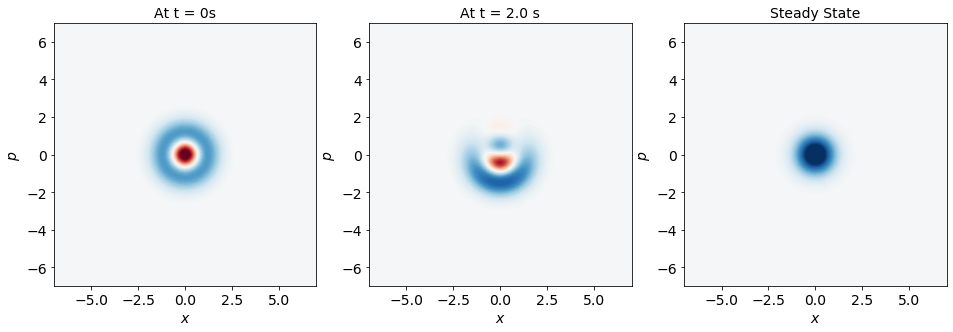

In [31]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

t_test = 2

# Plot steady state and time-evolution state
ax[0].contourf(xvec, xvec, W_list[0], 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
ax[0].set_aspect("equal"); ax[0].set_title("At t = 0s", fontsize=14); ax[0].tick_params(labelsize=14)
ax[0].set_xlabel(r"$x$", fontsize=14); ax[0].set_ylabel(r"$p$", fontsize=14)

ax[1].contourf(xvec, xvec, W_list[t_test*100], 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
ax[1].set_aspect("equal"); ax[1].set_title("At t = %.1f s"%(t_test), fontsize=14); ax[1].tick_params(labelsize=14)
ax[1].set_xlabel(r"$x$", fontsize=14); ax[1].set_ylabel(r"$p$", fontsize=14)

ax[2].contourf(xvec, xvec, wigner(rho_ss, xvec, xvec), 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
ax[2].set_aspect("equal"); ax[2].set_title("Steady State", fontsize=14); ax[2].tick_params(labelsize=14)
ax[2].set_xlabel(r"$x$", fontsize=14); ax[2].set_ylabel(r"$p$", fontsize=14)

plt.savefig("Cav_wig_states.png")

In [ ]:
# Prepare figure for animation
fname = "Wig_cav2.mp4"
# Animate evolution
def animate(n):
    ax[0].cla(); ax[0].set_aspect("equal"); ax[0].tick_params(labelsize=14)
    ax[0].set_title("Time: %.2f"%(output.times[n]), fontsize=14);
    ax[0].set_xlabel(r"$x$", fontsize=14); ax[0].set_ylabel(r"$p$", fontsize=14)
    
    im = ax[0].contourf(xvec, xvec, W_list[n], 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
    
    def setvisible(self, vis): # Work-around for visibility bug in contourf
        for c in self.collections: c.set_visible(vis)
    im.set_visible = types.MethodType(setvisible, im)

anim = ani.FuncAnimation(fig, animate, frames=len(output.times))
anim.save(fname,fps=150)
plt.close()


Starting from the excited state at t = 0s, the cavity gradually recedes to it's ground state in this Rabi-vacuum oscillation process. Note that the Wigner function is negative all through the process until it reaches a steady state at t > 20s, where the system can be considered a calssical state.